## REPORTE Nº7:
#### Alumno: Sonia Margarita Lecaros Jimenez / Código: 20226229
#### Curso: Fundamentos de Macroeconomia - 1REI05

## PARTE 1

The report for this week is The Effects of Exposure to Better Neighborhoods on children: New evidence from the moving to opportunity experiment; this article aims to explain individuals who live in high-poverty areas have less opportunity in economic, health, and education compared with people who live in lower poverty neighborhoods.
The report explains Moving to Opportunity (MTO) as a program run by the U.S Department of Housing and Urban Development. It offers selected families the opportunity of moving to lower-poverty neighborhoods.
The MTO experiment focused on the long-term impact on children above 13 when they were moved to better neighborhoods and how the result affected their future lives. 
The strength of this report is to explain how a small change in the lives of the families can make a massive difference in the future of all the family members but, most importantly, how it impacts the children and their future.
The weakness may be that an experiment can only be made true in a developing country with all the facilities and grants given to the government. This type of experiment can not be proven in a country like Peru, for example, where doesn't exist this type of help for a start.
The report includes variables like household income, college attendance, college quality, neighborhood characteristics in adulthood, marital status and fertility, tax filing and tax paid for in the experiment's methodology.  
 




In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
from sklearn.linear_model import LinearRegression

## Ploteo de Histogramas
Plotear la distribución de las notas para los tres grupos de manera separada.
Face to face
online lessons
blended format

Explicar que diferencias encuentran entre los tres histogramas

In [20]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.tail())
print("************RAW Data exported from CSV*************")
print(data.describe())
data = data.fillna(0) # Replace NaN/None values with 0 value
print("************Data Replace NaN/None values with 0 *************")
print(data.describe())

     gender  asian  black  hawaiian  hispanic  unknown  white  format_ol  \
318       0    0.0    0.0       0.0       0.0      0.0    1.0          0   
319       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
320       0    NaN    NaN       NaN       NaN      NaN    NaN          1   
321       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
322       1    0.0    0.0       0.0       0.0      0.0    1.0          0   

     format_blended  falsexam  
318             1.0  68.36000  
319             0.0  70.05000  
320             0.0  66.69000  
321             0.0  83.29997  
322             1.0  96.68000  
************RAW Data exported from CSV*************
           gender       asian       black    hawaiian    hispanic     unknown  \
count  323.000000  247.000000  247.000000  247.000000  247.000000  247.000000   
mean     0.578947    0.214575    0.068826    0.012146    0.016194    0.004049   
std      0.494494    0.411361    0.253672    0.109759   

In [21]:
# creando la columna dummy "class_format" para clasificar
data1 = (data.assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)
data1

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70.05000,online
320,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,66.69000,online
321,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,83.29997,online


In [22]:
# Ordenando el data frame para poder trabajar mas eficientemente
data2 = (data1
 .assign(etnicity = np.select(
     [data1["asian"].astype(bool), data1["black"].astype(bool),data1["hawaiian"].astype(bool),data1["hispanic"].astype(bool),data1["unknown"].astype(bool),data1["white"].astype(bool)],
     ["asian", "black","hawaiian","hispanic","unknown","white"],
     default="Not_answered" #create a new variable
 ))) #group by the new variable (treatments)
data2.gender=data2.gender.replace({1:"Male", 0: "Female"})
data3=data2.drop(columns=['asian', 'black','hawaiian','unknown','white','format_blended','hispanic','format_ol','format_blended'])
data3 = data3[['gender','etnicity','class_format','falsexam']]
data3

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
2,Male,white,blended,83.37000
3,Male,white,blended,90.01994
4,Male,white,online,83.30000
...,...,...,...,...
318,Female,white,blended,68.36000
319,Male,Not_answered,online,70.05000
320,Female,Not_answered,online,66.69000
321,Male,Not_answered,online,83.29997


## Diferencias entre los tres histogramas 

1. Histogramas de las notas (falsexam) versus la modalidad de la clase (class_format)
* La modalidad de clase mas escogida es "face to face" con un total de 120 personas adicional tiene el  promedio mas alto 78.54
* La modalidad de clase menos escogida es "online" con un total de 94 personas con el promedio mas bajo porque presenta dos notas de 0.0(Outliers)
 

falsexam                                                       \
                count       mean        std       min       25%        50%   
class_format                                                                 
blended         109.0  77.093731  10.085906  48.33998  70.08000  78.310000   
face_to_face    120.0  78.547485   9.556128  54.94998  71.21500  79.989985   
online           94.0  73.635263  14.903313   0.00000  66.66675  76.640000   

                                
                    75%    max  
class_format                    
blended       84.970000  96.68  
face_to_face  86.640000  96.68  
online        83.299993  94.99

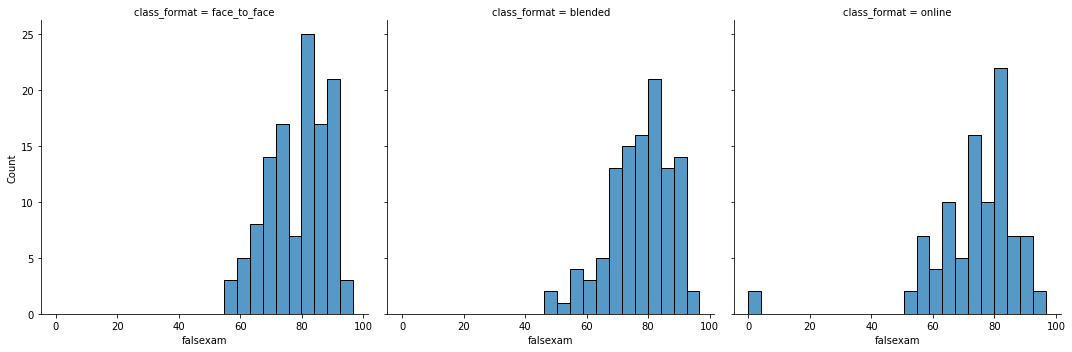

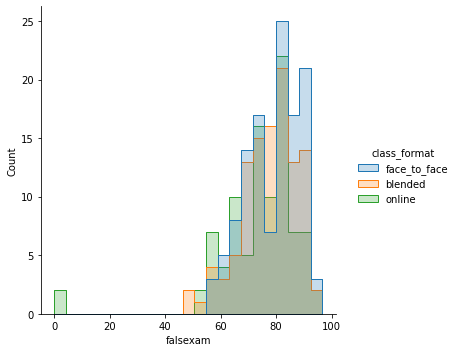

In [23]:
sns.displot(data3, x="falsexam",col="class_format")
sns.displot(data3, x="falsexam",hue="class_format", element = "step")
data3.groupby(["class_format"]).describe()

## Difference-in-means estimator

1. Crear un nuevo dataset donde soloo se incluyan los grupos "face to face y online

In [24]:
# 1. Crear un nuevo data set que solo incluya "face to face" y "online"
# eliminando las filas con el valor blended en la columna class_format
data4 = data3[data3["class_format"].str.contains("blended") == False]
data4

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
4,Male,white,online,83.30000
5,Female,asian,online,88.34996
7,Male,asian,face_to_face,90.00000
...,...,...,...,...
316,Female,white,face_to_face,91.65000
317,Male,Not_answered,face_to_face,84.99000
319,Male,Not_answered,online,70.05000
320,Female,Not_answered,online,66.69000


2. Calcular el promedio del grupo online lessons
3. Calcular el promedio del grupo face to face
4. Tomar la diferencia entre elo valor encontrado en 2 y el valor en 3.

In [25]:
dif_mean = data4.groupby(["class_format"]).mean()
print("Respuesta2:El promedio de face to face clase es: ", dif_mean.iat[0, 0])
print("Respuesta3:El promedio de online clase es: ", dif_mean.iat[1, 0])
print("Respuesta4:La diferencia de promedio face to face y online class: ", dif_mean.iat[0, 0]- dif_mean.iat[1, 0])


Respuesta2:El promedio de face to face clase es:  78.54748458333333
Respuesta3:El promedio de online clase es:  73.63526308510637
Respuesta4:La diferencia de promedio face to face y online class:  4.912221498226955


## Cuál es la interpretacion del resultado encontrado? 

* Basado en los promedio la clase face to face tiene mas resulatado que la clase online
* La cantidad de alumnos que oprtaron por la clase face to face es mayor a online
* Dentro de los resultados online hay dos outlier con el valor 0.0 en la data no se indica
* Si hubo un error en sus califaciones o tuvieron dificulatades tecnicas durante la evaluacion, por lo tanto esa data se ha   mantenido

## Difference-in-means estimator via linear regression

* Crear una variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.
* Realizar una regresión lineal donde Y= Las notas, T=Dummy creada para este tipo de clase.
* Esta regresión es de la siguiente manera Y = beta_0 + beta_1*T+e. El valor que se encuentre para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.

In [26]:
# Crear una variable dummy con las siguientes condiciones
# Clase Online = 1
# Clase face to face = 0

data5 = data4
data5['Dummy'] = data5['class_format']
data5.Dummy=data5.Dummy.replace({"face_to_face":0, "online":1 })
data5=data5.drop(columns=['gender', 'etnicity'])
data5


C:\Users\sonia\AppData\Local\Temp\ipykernel_5244\1693920640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['Dummy'] = data5['class_format']
C:\Users\sonia\AppData\Local\Temp\ipykernel_5244\1693920640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.Dummy=data5.Dummy.replace({"face_to_face":0, "online":1 })


,class_format,falsexam,Dummy
0,face_to_face,63.29997,0
1,face_to_face,79.96000,0
4,online,83.30000,1
5,online,88.34996,1
7,face_to_face,90.00000,0
...,...,...,...
316,face_to_face,91.65000,0
317,face_to_face,84.99000,0
319,online,70.05000,1
320,online,66.69000,1


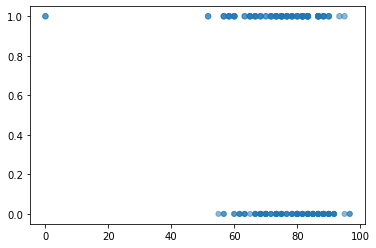

In [27]:
data6=data5
beta_0 = 25.0
beta_1 = dif_mean.iat[0, 0]- dif_mean.iat[1, 0]
e = 0.5

data6['Y'] = beta_0  + beta_1 * data6.Dummy +  e

plt.scatter(data6['falsexam'],data6['Dummy'] , s=data6['Y'], alpha=0.5)